In [1]:
#import Libraries
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Load the dataset
df= pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [7]:
#statistics of dataset
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [9]:
#print summary of the dataframe.checking for empty data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


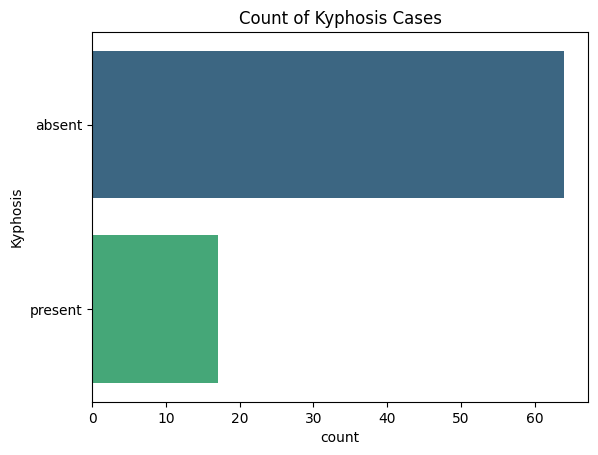

In [13]:
#count patient - as abscent or present
sns.countplot(y='Kyphosis', data=df, hue='Kyphosis', palette='viridis')
plt.xlabel('count')
plt.ylabel('Kyphosis')
plt.title('Count of Kyphosis Cases')
plt.show()

In [15]:
# Conduct datapreprocessing.import class
#Instantiate an object from class
LabelEncoder_y= LabelEncoder()
df['Kyphosis'] = LabelEncoder_y.fit_transform(df['Kyphosis'])
df.head()


,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [17]:
#Abscent - no kyphosis after operation
kyphosis_False = df[df['Kyphosis'] == 0]
kyphosis_False.head()


,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [19]:
print('Disease abscent after operation percentage =',(len(kyphosis_False)/len(df)*100,'%'))


Disease abscent after operation percentage = (79.01234567901234, '%')


In [21]:
#Present- Kyphosis still after the operation
kyphosis_True = df[df['Kyphosis'] == 1]
kyphosis_True.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [23]:
print('Disease present after operation percentage =',(len(kyphosis_True)/len(df)*100,'%'))

Disease present after operation percentage = (20.98765432098765, '%')


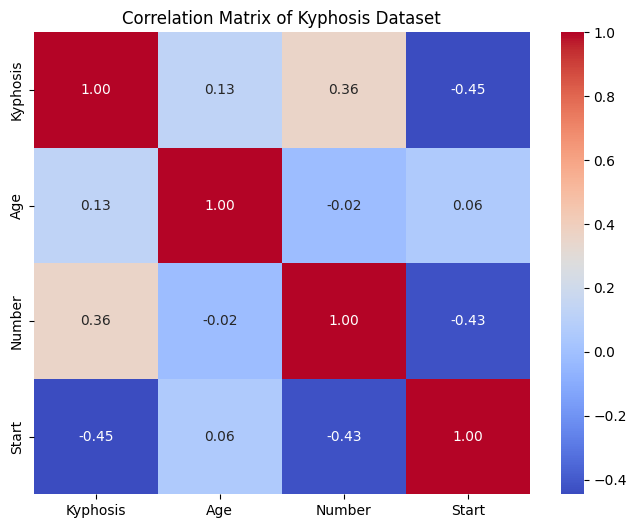

In [25]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Kyphosis Dataset')
plt.show()

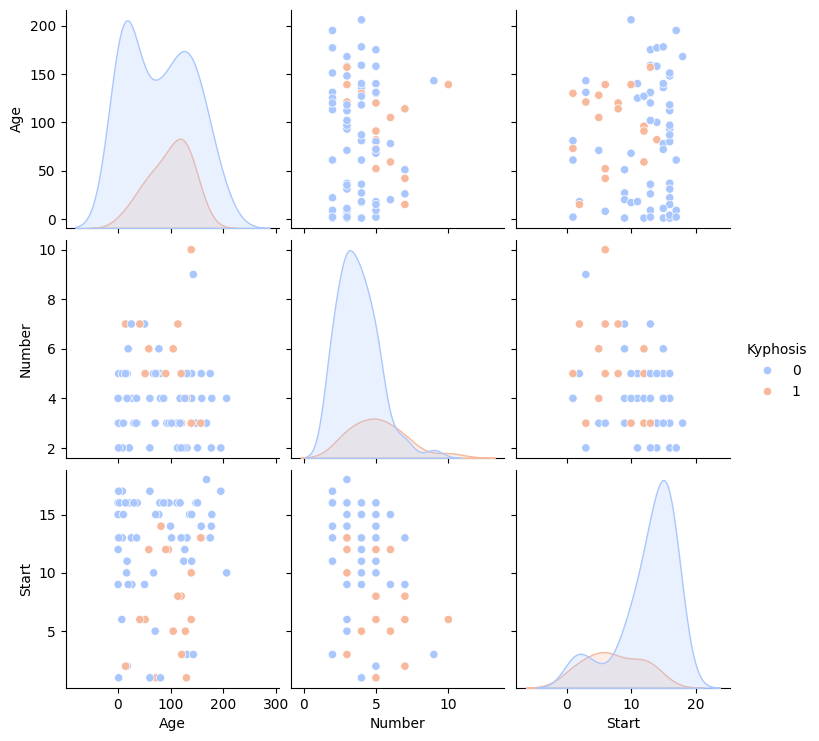

In [35]:
# Generate a pairplot for the features
sns.pairplot(df, hue='Kyphosis', palette='coolwarm')
plt.show()

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']


imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [31]:
# Create Decision Tree Classifier object
dtree = DecisionTreeClassifier(class_weight='balanced')

# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

In [33]:
# Predict the response for test dataset
y_pred = dtree.predict(X_test)

In [82]:
from sklearn.metrics import classification_report, accuracy_score

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8823529411764706
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.50      0.67         4

    accuracy                           0.88        17
   macro avg       0.93      0.75      0.80        17
weighted avg       0.90      0.88      0.87        17



In [35]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object with n_estimators=150
rfc = RandomForestClassifier(n_estimators=150, random_state=42)

# Train the Random Forest Classifier
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [37]:
# Predict the response for test dataset
y_pred_rf = rfc.predict(X_test)

In a Random Forest algorithm, n_estimators refers to the number of decision trees that the algorithm will build.

Think of it like having a committee make a decision instead of just one person. Each tree in the Random Forest is like a committee member. They all look at the data and make their own prediction. The Random Forest then combines the predictions from all these individual trees to make a final, more robust prediction.

Increasing the number of estimators (trees) generally helps to improve the model's accuracy and reduces the risk of overfitting, up to a certain point.

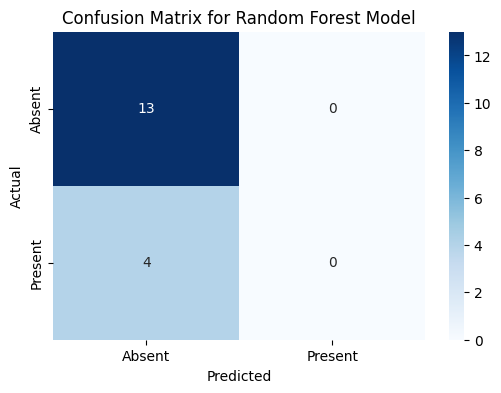

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Absent', 'Present'], yticklabels=['Absent', 'Present'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

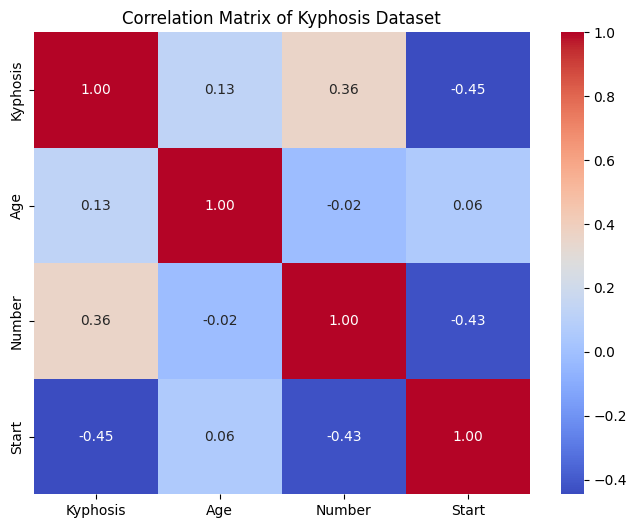

In [43]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Kyphosis Dataset')
plt.show()

Based on the outputs from the cells above:


Decision Tree Confusion Matrix:

True Negatives (Absent correctly predicted as Absent): 13
False Positives (Absent incorrectly predicted as Present): 0
False Negatives (Present incorrectly predicted as Absent): 2
True Positives (Present correctly predicted as Present): 2


Random Forest Confusion Matrix:

True Negatives (Absent correctly predicted as Absent): 13
False Positives (Absent incorrectly predicted as Present): 0
False Negatives (Present incorrectly predicted as Absent): 3
True Positives (Present correctly predicted as Present): 1

Comparison:

True Negatives: Both models have the same number of True Negatives (13). They are equally good at correctly identifying cases where Kyphosis is absent.

False Positives: Both models have 0 False Positives. This is excellent, as neither model incorrectly predicts Kyphosis is present when it is not in this test set.

False Negatives: The Random Forest model has a slightly higher number of
False Negatives (3) compared to the Decision Tree (2). This means the Random Forest is slightly more likely to incorrectly predict Kyphosis is absent when it is present.

True Positives: The Decision Tree model has a higher number of True Positives (2) compared to the Random Forest (1). This suggests the Decision Tree was slightly better at correctly identifying cases where Kyphosis is present in this specific test set.


In summary, based on these specific confusion matrices, both models perform very well in avoiding False Positives. The Decision Tree is slightly better at identifying actual "Present" cases (higher TP and lower FN), while the Random Forest is slightly worse in this regard.

In [72]:
# Train the Random Forest model
rfc = RandomForestClassifier(n_estimators=150, class_weight='balanced')
rfc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_rf = rfc.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model :")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Model :
Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.67      0.50      0.57         4

    accuracy                           0.82        17
   macro avg       0.76      0.71      0.73        17
weighted avg       0.81      0.82      0.81        17



Argument for Choosing a Model based on their classification reports



Comparing these classification reports, we see a difference in how each model performs, particularly for the minority class ("Present" - class 1).


Accuracy: The Decision Tree model has a slightly higher accuracy (0.88) compared to the Random Forest model (0.82) on this specific test set.


Precision and Recall for "Absent" (Class 0): Both models perform very well for the "Absent" class. The Decision Tree has perfect recall (1.00), while the Random Forest has slightly higher precision (0.86 vs 0.87).
Precision and Recall for "Present" (Class 1): This is the crucial part for making a choice:


The Decision Tree model has a perfect precision (1.00) for the "Present" class, meaning that when it predicts "Present", it is always correct. Its recall is 0.50, meaning it identifies half of the actual "Present" cases.
The Random Forest model has a lower precision (0.67) for the "Present" class, meaning some of its "Present" predictions are incorrect. Its recall is also 0.50, the same as the Decision Tree.


Conclusion:

Based on these results, the Decision Tree model appears to be slightly better on this test set. It achieves a higher overall accuracy and, importantly, has perfect precision for the "Present" class. This means that if avoiding false positives for Kyphosis is critical (i.e., you want to be very sure when the model says Kyphosis is present), the Decision Tree is the better choice as it never incorrectly predicts "Present" in this test set. While both models have the same recall for the "Present" class (missing half of the actual cases), the Decision Tree's perfect precision gives it an edge in this scenario.

